<a href="https://colab.research.google.com/github/Anggarciaar/Proyecto_AnalisisGeoespacial/blob/main/analisis_de_puntos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Librerias**

In [123]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn as sbn
import contextily as ctx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [127]:
# Carga de datos de pozos
db = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozos/Pozos.shp")

In [128]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         263 non-null    int64   
 1   UWI         263 non-null    object  
 2   WELL_NAME   263 non-null    object  
 3   WELL_COUNT  263 non-null    object  
 4   DEPARTAMEN  263 non-null    object  
 5   WELL_COU_1  263 non-null    object  
 6   FIELD_ABRE  259 non-null    object  
 7   GEOLOGIC_P  263 non-null    object  
 8   CONTRATO    263 non-null    object  
 9   WELL_LONGI  263 non-null    float64 
 10  WELL_LATIT  263 non-null    float64 
 11  WELL_CLA_1  179 non-null    object  
 12  WELL_STA_1  259 non-null    object  
 13  WELLTYPE    154 non-null    object  
 14  OPERATOR_W  263 non-null    object  
 15  COMPANY_CO  263 non-null    object  
 16  PLATO       0 non-null      float64 
 17  X           263 non-null    float64 
 18  Y           263 non-null    float64 
 19  

In [129]:
db.head(2)

,FID,UWI,WELL_NAME,WELL_COUNT,DEPARTAMEN,WELL_COU_1,FIELD_ABRE,GEOLOGIC_P,CONTRATO,WELL_LONGI,WELL_LATIT,WELL_CLA_1,WELL_STA_1,WELLTYPE,OPERATOR_W,COMPANY_CO,PLATO,X,Y,geometry
0,104,ARRE0007P,P-7 ARROYO ARENA,COLOMBIA,BOLIVAR,EL CARMEN DE BOLIVAR,SAMAN,SINU-SAN JACINTO,SAMAN,-75.160033,9.725972,A3,SIN ESTADO,VERTICAL,HOCOL S.A.,HOCOL S.A.,NaN,881207.812,1567502.625,POINT Z (881207.812 1567502.625 1640.490)
1,173,SANS0002,SAN SEBASTIAN-2,COLOMBIA,CORDOBA,SAN ANTERO,SN 6,SINU-SAN JACINTO,PENDIENTE,-75.773934,9.300281,A3,TAPONADO Y ABANDONADO,VERTICAL,SOCONY VACUUM OIL COMPANY OF COLOMBIA,AGENCIA NACIONAL DE HIDROCARBUROS,NaN,813594.813,1520675.625,POINT Z (813594.813 1520675.625 2194.000)


In [130]:
type(db)

geopandas.geodataframe.GeoDataFrame

## Centrografia

In [131]:
!pip install pointpats
from pointpats import centrography

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
Pozos = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozos/Pozos_.shp")

In [133]:
Pozos.head(2)

,FID,UWI,WELL_NAME,WELL_COUNT,DEPARTAMEN,WELL_COU_1,FIELD_ABRE,GEOLOGIC_P,CONTRATO,WELL_LONGI,...,WELL_CLA_1,WELL_STA_1,WELLTYPE,OPERATOR_W,COMPANY_CO,PLATO,X,Y,estado,geometry
0,104,ARRE0007P,P-7 ARROYO ARENA,COLOMBIA,BOLIVAR,EL CARMEN DE BOLIVAR,SAMAN,SINU-SAN JACINTO,SAMAN,-75.160033,...,A3,SIN ESTADO,VERTICAL,HOCOL S.A.,HOCOL S.A.,NaN,881207.812,1567502.625,6,POINT Z (881207.812 1567502.625 1640.490)
1,173,SANS0002,SAN SEBASTIAN-2,COLOMBIA,CORDOBA,SAN ANTERO,SN 6,SINU-SAN JACINTO,PENDIENTE,-75.773934,...,A3,TAPONADO Y ABANDONADO,VERTICAL,SOCONY VACUUM OIL COMPANY OF COLOMBIA,AGENCIA NACIONAL DE HIDROCARBUROS,NaN,813594.813,1520675.625,7,POINT Z (813594.813 1520675.625 2194.000)


In [134]:
mean_center = centrography.mean_center(Pozos[['X', 'Y']])
med_center = centrography.euclidean_median(Pozos[['X', 'Y']])

In [135]:
!pip install contextily
import seaborn as sbn
import contextily as ctx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
import matplotlib.pyplot as plt

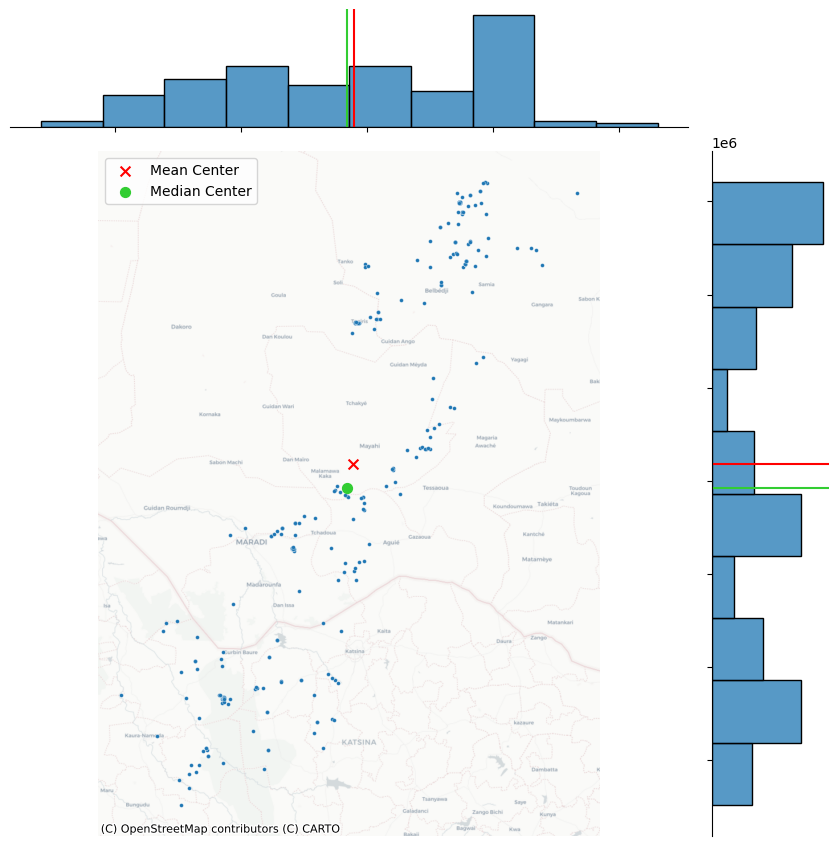

<Figure size 640x480 with 0 Axes>

In [137]:
# Generate scatter plot
joint_axes = sbn.jointplot(
    x='X', y='Y', data=Pozos, s=7.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
ctx.add_basemap(
    joint_axes.ax_joint,
    source=ctx.providers.CartoDB.Positron
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()


plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozosmediancenter.png')


In [138]:
centrography.std_distance(Pozos[['X','Y']])

117992.7670073081

In [139]:
major, minor, rotation = centrography.ellipse(Pozos[['X','Y']])

In [140]:
major

30034.071555952265

In [141]:
minor

106161.05586435075

In [142]:
import numpy

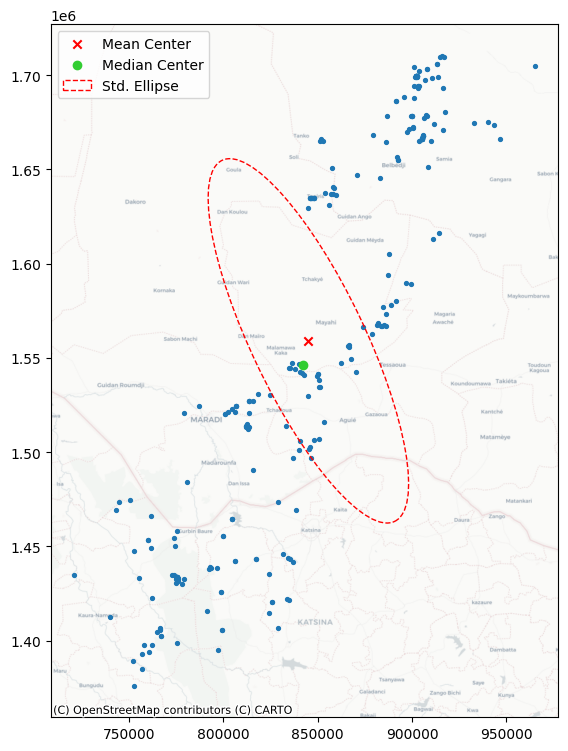

<Figure size 640x480 with 0 Axes>

In [143]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(Pozos['X'], Pozos['Y'], s=7.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2,
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none',
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
plt.show()

plt.savefig('/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozoscenter.png')

In [144]:
Pozos.head(2)

,FID,UWI,WELL_NAME,WELL_COUNT,DEPARTAMEN,WELL_COU_1,FIELD_ABRE,GEOLOGIC_P,CONTRATO,WELL_LONGI,...,WELL_CLA_1,WELL_STA_1,WELLTYPE,OPERATOR_W,COMPANY_CO,PLATO,X,Y,estado,geometry
0,104,ARRE0007P,P-7 ARROYO ARENA,COLOMBIA,BOLIVAR,EL CARMEN DE BOLIVAR,SAMAN,SINU-SAN JACINTO,SAMAN,-75.160033,...,A3,SIN ESTADO,VERTICAL,HOCOL S.A.,HOCOL S.A.,NaN,881207.812,1567502.625,6,POINT Z (881207.812 1567502.625 1640.490)
1,173,SANS0002,SAN SEBASTIAN-2,COLOMBIA,CORDOBA,SAN ANTERO,SN 6,SINU-SAN JACINTO,PENDIENTE,-75.773934,...,A3,TAPONADO Y ABANDONADO,VERTICAL,SOCONY VACUUM OIL COMPANY OF COLOMBIA,AGENCIA NACIONAL DE HIDROCARBUROS,NaN,813594.813,1520675.625,7,POINT Z (813594.813 1520675.625 2194.000)


### Analisis Sismica 2D al Norte

In [145]:
S2 = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/2DsismicaNorte.shp")

In [175]:
S2.head(220)


,org_fid,distance,X,Y,geometry
0,5,0.0,870878.896,1618996.108,POINT (870878.896 1618996.108)
1,5,8000.0,877826.461,1615383.225,POINT (877826.461 1615383.225)
2,5,16000.0,884792.783,1611760.385,POINT (884792.783 1611760.385)
3,5,24000.0,891772.978,1608132.422,POINT (891772.978 1608132.422)
4,5,32000.0,898749.444,1604505.085,POINT (898749.444 1604505.085)
...,...,...,...,...,...
215,112,8000.0,877930.816,1678990.677,POINT (877930.816 1678990.677)
216,112,16000.0,884143.542,1674210.256,POINT (884143.542 1674210.256)
217,112,24000.0,891274.049,1670948.753,POINT (891274.049 1670948.753)
218,112,32000.0,898104.425,1667118.052,POINT (898104.425 1667118.052)


In [176]:
user = S2.query('org_fid')
coordinate = S2[['X','Y']].values

In [187]:
convex_hull_vertice = centrography.hull(coordinate)

In [180]:
import libpysal


In [181]:
alphashape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinate, return_circles=True)

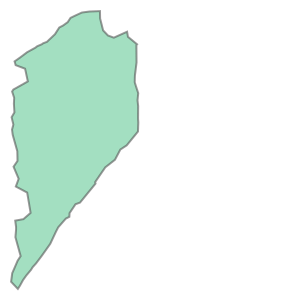

In [182]:
alphashape

In [152]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
min_rot_rect = centrography.minimum_rotated_rectangle(coordinate)

In [184]:
min_rect_vertices = centrography.minimum_bounding_rectangle(coordinate)

In [185]:
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [186]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinate)


ZeroDivisionError: ignored

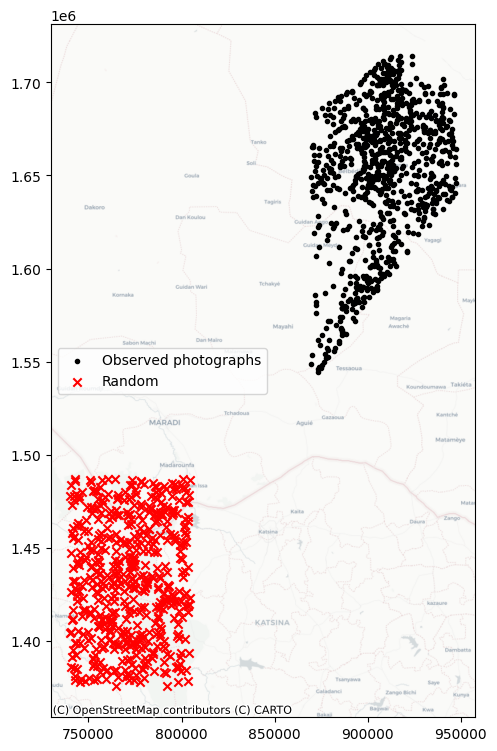

In [162]:

f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinate.T, color='k', marker='.', label='Observed photographs')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

In [163]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinate))

In [ ]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinate.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()


## Estadistica de cuadrante

In [ ]:
qstats2 = QStatistic(coordinate, nx = 2, ny = 2)
qstats2.plot()

In [ ]:
qstats2.chi2_pvalue

In [ ]:
qstats2_null = QStatistic(random_pattern)
qstats2_null.plot()

In [ ]:
qstats2_null.chi2_pvalue

In [ ]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [ ]:
qstats2_null.chi2_pvalue

In [ ]:
qstats2_null_ashape = QStatistic(random_pattern_ashape)
qstats2_null_ashape.plot()

In [ ]:
qstats2_null_ashape.chi2_pvalue

## Función de K de Ripley

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


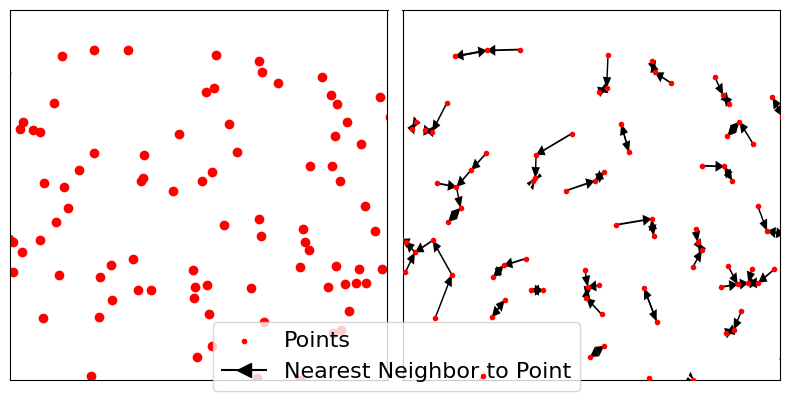

In [114]:
# this code should be hidden in the book, and only the plot visible!
f,ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax[0].scatter(*random_pattern.T, color='red')
ax[1].scatter(*random_pattern.T, color='red',
              zorder=100, marker='.', label='Points')
nn_ixs, nn_ds = PointPattern(random_pattern).knn(1)
first = True
for coord, nn_ix, nn_d in zip(random_pattern, nn_ixs, nn_ds):
    dx, dy = random_pattern[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(*coord, dx,dy,
                length_includes_head=True,
                overhang=0, head_length=300*3,
                head_width=300*3, width=50*3,
                linewidth=0, facecolor='k',
                head_starts_at_zero=False)
    if first:
        plt.plot((1e100, 1e101), (0,1), color='k',
                 marker='<', markersize=10,
                 label='Nearest Neighbor to Point')
    first = False

ax[0].axis([751591.2,791591.2, 1460255.942, 1490255.942])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
f.tight_layout()
ax[1].legend(bbox_to_anchor = (.5,-.06), fontsize=16)
plt.show()



### **G de Ripley**

In [103]:
g_test = distance_statistics.g_test(
    coordinate, support=40, keep_simulations=True
)


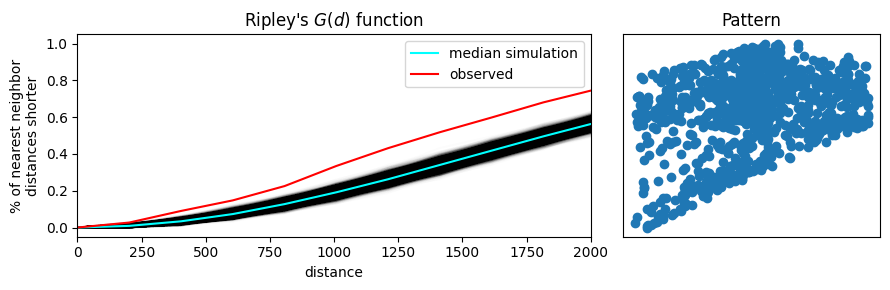

In [104]:
f,ax = plt.subplots(1,2,figsize=(9,3),
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='cyan',
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinate.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()


**F de Ripley**

In [105]:

f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)


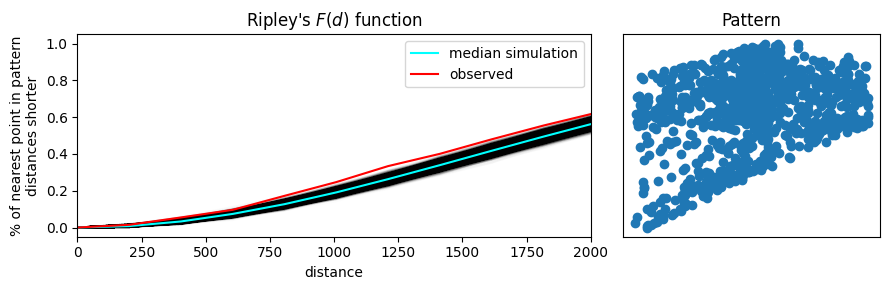

In [106]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan',
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()



## Analisis Sismica 2D al **Sur**

In [79]:
S1 = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/2DsismicaSur.shp")

In [80]:
S1.head(2)

,org_fid,distance,X,Y,geometry
0,1,0.0,771591.290,1470255.942,POINT (771591.290 1470255.942)
1,1,8000.0,779326.039,1468608.607,POINT (779326.039 1468608.607)


In [81]:
user = S1.query('org_fid == "5"')
coordinates =  S1[['X','Y']].values

In [82]:
convex_hull_vertices = centrography.hull(coordinates)

In [83]:
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

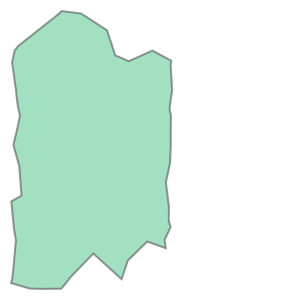

In [84]:
alpha_shape

In [86]:
min_rot_rect = centrography.minimum_rotated_rectangle(coordinates)

In [87]:
min_rect_vertices = centrography.minimum_bounding_rectangle(coordinates)

In [88]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinates)

In [85]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

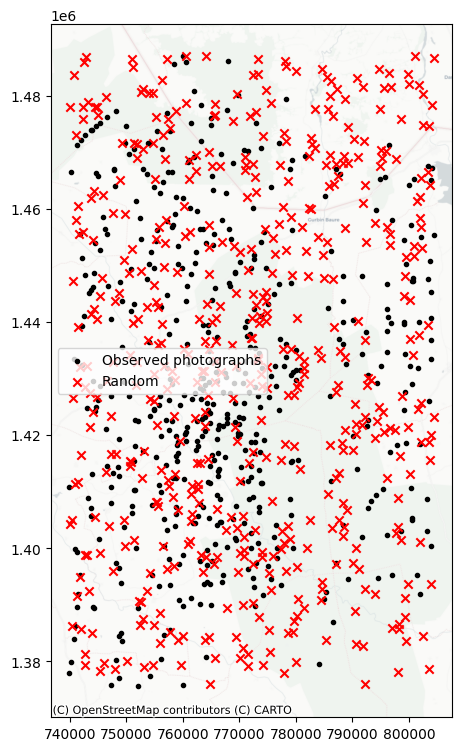

In [89]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed photographs')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

In [90]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

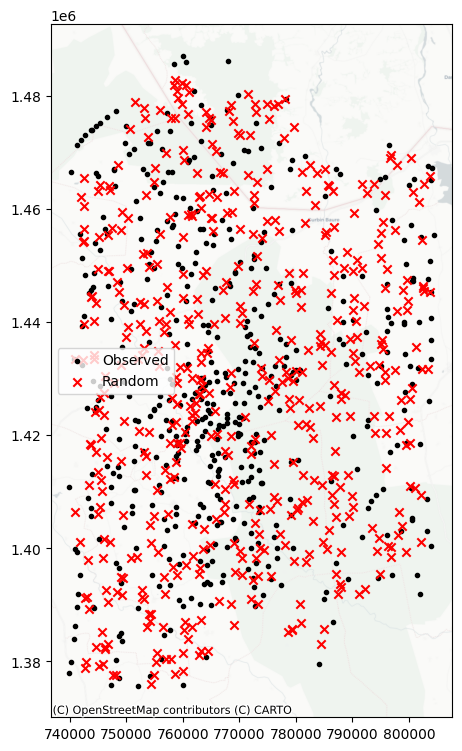

In [91]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random')
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

## **Estadistica de cuadrante**

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


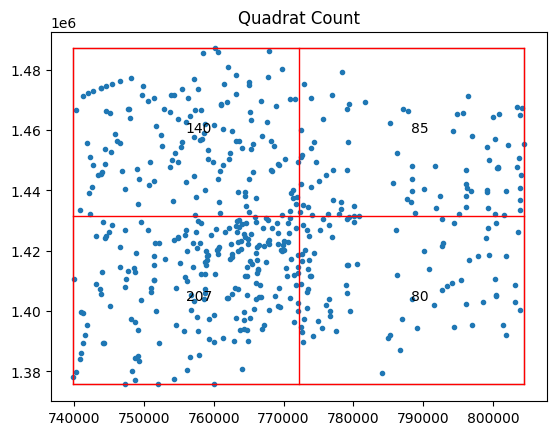

In [ ]:
qstat = QStatistic(coordinates, nx = 2, ny = 2)
qstat.plot()

In [ ]:
qstat.chi2_pvalue

9.717873236658625e-18

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


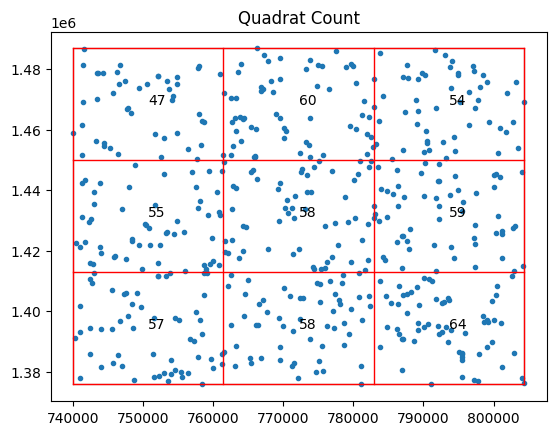

In [ ]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [ ]:
qstat_null.chi2_pvalue

0.9273071911648435

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


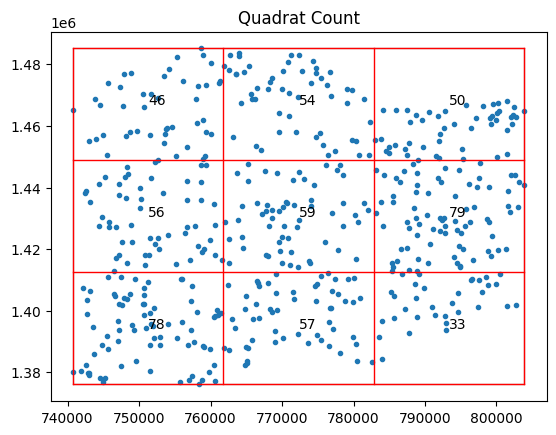

In [ ]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

In [ ]:
qstat_null_ashape.chi2_pvalue

0.00024696615582591185

### **Función K de Ripley**

/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


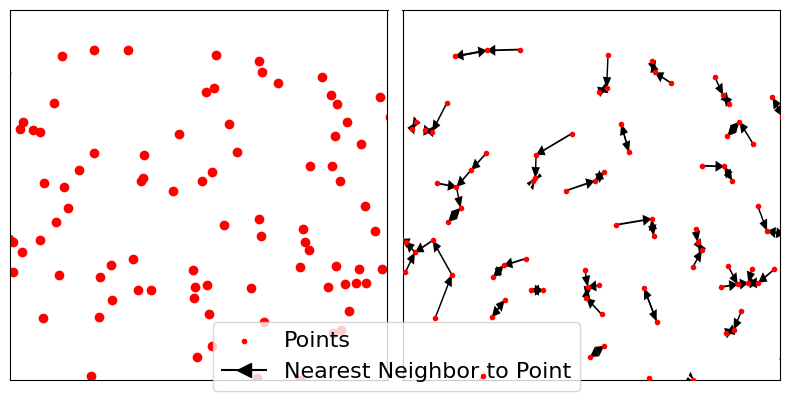

In [113]:
# this code should be hidden in the book, and only the plot visible!
f,ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax[0].scatter(*random_pattern.T, color='red')
ax[1].scatter(*random_pattern.T, color='red',
              zorder=100, marker='.', label='Points')
nn_ixs, nn_ds = PointPattern(random_pattern).knn(1)
first = True
for coord, nn_ix, nn_d in zip(random_pattern, nn_ixs, nn_ds):
    dx, dy = random_pattern[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(*coord, dx,dy,
                length_includes_head=True,
                overhang=0, head_length=300*3,
                head_width=300*3, width=50*3,
                linewidth=0, facecolor='k',
                head_starts_at_zero=False)
    if first:
        plt.plot((1e100, 1e101), (0,1), color='k',
                 marker='<', markersize=10,
                 label='Nearest Neighbor to Point')
    first = False

ax[0].axis([751591.2,791591.2, 1460255.942, 1490255.942])
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_xticks([])
ax[0].set_yticks([])
f.tight_layout()
ax[1].legend(bbox_to_anchor = (.5,-.06), fontsize=16)
plt.show()

### **G de Ripley**

In [ ]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

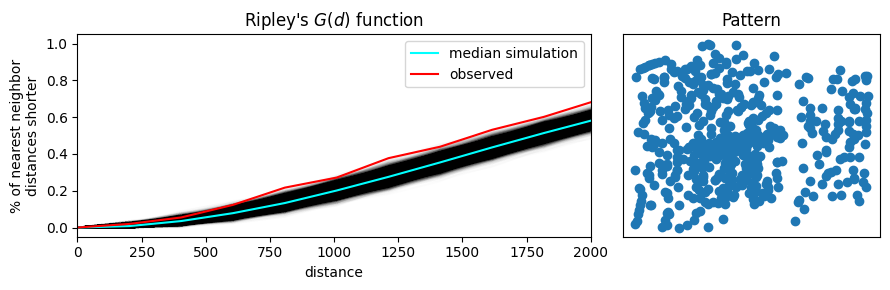

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3),
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='cyan',
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

## **F de Ripley**


In [ ]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

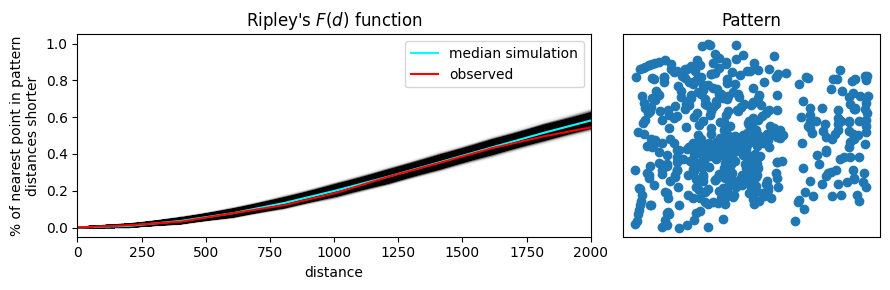

In [ ]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan',
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

## Clustering as feature engineering



In [63]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3542002 sha256=4b7f98dda40878522312b7422732e0299512b5823666c1bbceddd61dd421cbb7
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [105]:
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np

In [65]:
P = gpd.read_file("/content/drive/MyDrive/DATA_ProyectoAG/Datos creados/Pozos/Pozos_.shp")

In [66]:
P.head(2)

,FID,UWI,WELL_NAME,WELL_COUNT,DEPARTAMEN,WELL_COU_1,FIELD_ABRE,GEOLOGIC_P,CONTRATO,WELL_LONGI,...,WELL_CLA_1,WELL_STA_1,WELLTYPE,OPERATOR_W,COMPANY_CO,PLATO,X,Y,estado,geometry
0,104,ARRE0007P,P-7 ARROYO ARENA,COLOMBIA,BOLIVAR,EL CARMEN DE BOLIVAR,SAMAN,SINU-SAN JACINTO,SAMAN,-75.160033,...,A3,SIN ESTADO,VERTICAL,HOCOL S.A.,HOCOL S.A.,NaN,881207.812,1567502.625,6,POINT Z (881207.812 1567502.625 1640.490)
1,173,SANS0002,SAN SEBASTIAN-2,COLOMBIA,CORDOBA,SAN ANTERO,SN 6,SINU-SAN JACINTO,PENDIENTE,-75.773934,...,A3,TAPONADO Y ABANDONADO,VERTICAL,SOCONY VACUUM OIL COMPANY OF COLOMBIA,AGENCIA NACIONAL DE HIDROCARBUROS,NaN,813594.813,1520675.625,7,POINT Z (813594.813 1520675.625 2194.000)


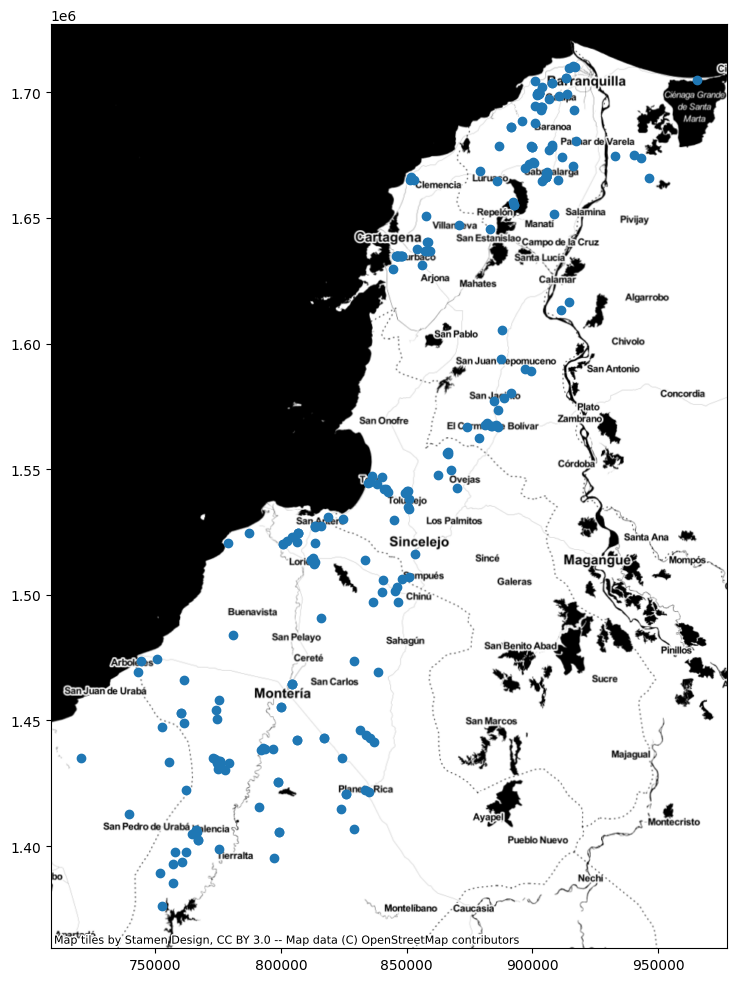

In [67]:
f,ax = plt.subplots(1,figsize=(12, 12))
P.plot(ax=ax, marker='o')
ctx.add_basemap(
    ax,
    crs=P.crs.to_string(),
    source=ctx.providers.Stamen.Toner
)

In [164]:
db_albers = P.to_crs(epsg=3311)
coor = np.column_stack((db_albers.geometry.x, db_albers.geometry.y))


In [169]:
labels= HDBSCAN(min_cluster_size=2).fit(coor).labels_

In [172]:
print(type(labels))


<class 'numpy.ndarray'>


In [166]:
hulls = P[['geometry']].dissolve(by=labels).convex_hull

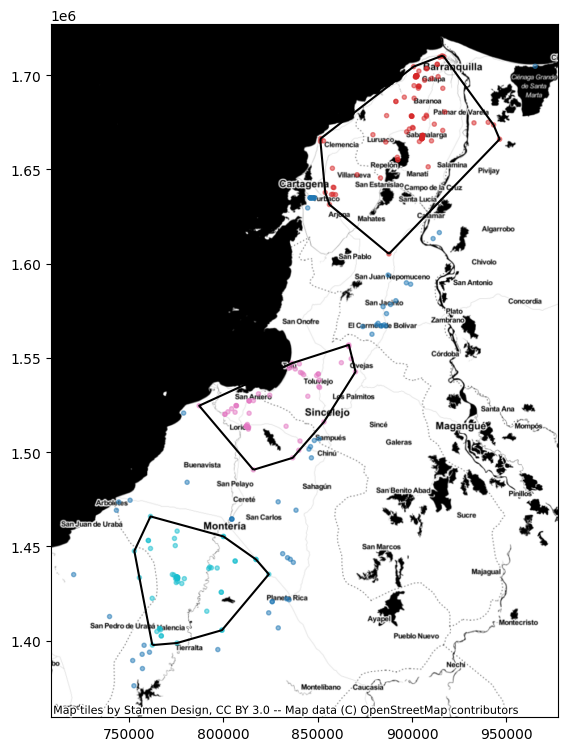

In [167]:
f, ax = plt.subplots(1, figsize=(9, 9))
P.plot(column=labels,
                    categorical=True,
                    alpha=0.5,
                    legend=False,
                    ax=ax, marker='.'
                    )
hulls[hulls.index >=0].boundary.plot(color='k', ax=ax,)
ctx.add_basemap(ax,
                       crs=P.crs.to_string(),
                       source=ctx.providers.Stamen.Toner
                      )